# Imports

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading the files containing Embeddings and Labels

In [2]:
with open("cb513_embeddings.json", "r") as f:
    embeddings = json.load(f)

labels_df = pd.read_csv("CB513.csv")

# Data Processing

In [3]:
x = []
y_q3 = []
y_q8 = []

for sequence, embedding in embeddings.items():
  q3_labels = labels_df[labels_df['input'] == sequence]['dssp3'].values[0]
  q8_labels = labels_df[labels_df['input'] == sequence]['dssp8'].values[0]

  for aa, emb, q3, q8 in zip(sequence, embedding, q3_labels, q8_labels):
    x.append(emb)
    y_q3.append(q3)
    y_q8.append(q8)

    print(f"{aa}=>{emb[:5]}... => {q3}, {q8}")

R=>[0.06670675426721573, 0.07403519004583359, 0.06657278537750244, -0.24361592531204224, 0.15679219365119934]... => C, C
T=>[0.002008690033107996, 0.059936314821243286, 0.03631291911005974, -0.21896666288375854, 0.27227723598480225]... => C, C
D=>[0.026422102004289627, 0.0454460047185421, -0.031244048848748207, -0.02207089401781559, 0.12498170882463455]... => C, C
C=>[-0.007181279826909304, -0.044498100876808167, -0.10330807417631149, -0.004010183271020651, 0.09004198759794235]... => C, T
Y=>[-0.01590546779334545, 0.05406865477561951, -0.02630102075636387, 0.006551867350935936, 0.1680482178926468]... => C, T
G=>[0.018489986658096313, 0.012185612693428993, -0.050916146486997604, 0.04193602129817009, 0.0025526760146021843]... => C, C
N=>[0.0076456377282738686, -0.017449647188186646, 0.00027401690022088587, 0.031822752207517624, 0.17018558084964752]... => C, C
V=>[-0.13955409824848175, -0.023502927273511887, -0.14680683612823486, -0.0011775486636906862, 0.15597394108772278]... => H, G
N=>

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Converting to NumPy Arrays

In [4]:
x = np.array(x)
y_q3 = np.array(y_q3)
y_q8 = np.array(y_q8)

# Train-Test Split

In [5]:
x_train, x_val, y_q3_train, y_q3_val = train_test_split(x, y_q3, test_size=0.2, random_state=42)
_, _, y_q8_train, y_q8_val = train_test_split(x, y_q8, test_size=0.2, random_state=42)


# Train Random Forest

Training RandomForest on Q8 classification


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



✅ Accuracy: 0.4695

📊 Classification Report:
              precision    recall  f1-score   support

           B     0.6667    0.0074    0.0145       272
           C     0.3988    0.4915    0.4404      4905
           E     0.5498    0.4499    0.4948      4417
           G     0.8889    0.0104    0.0206       767
           H     0.4816    0.8553    0.6162      6434
           I     0.0000    0.0000    0.0000       110
           S     0.5250    0.0103    0.0202      2039
           T     0.4150    0.0261    0.0490      2341

    accuracy                         0.4695     21285
   macro avg     0.4907    0.2314    0.2070     21285
weighted avg     0.4881    0.4695    0.3987     21285



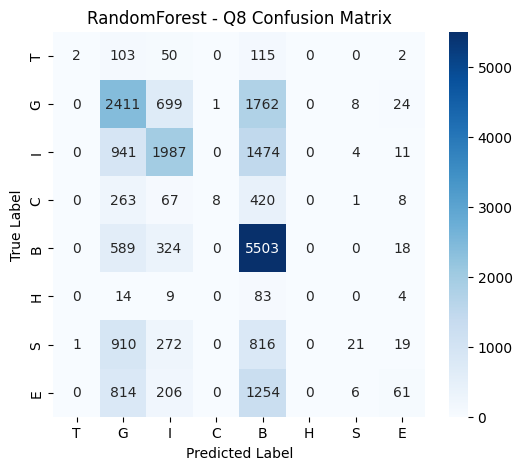

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Training RandomForest on Q8 classification")
model.fit(x_train, y_q8_train)
y_q8_pred = model.predict(x_val)
acc = accuracy_score(y_q8_val, y_q8_pred)
report = classification_report(y_q8_val, y_q8_pred, digits=4)
cm = confusion_matrix(y_q8_val, y_q8_pred)

print(f"\n✅ Accuracy: {acc:.4f}\n")
print("📊 Classification Report:")
print(report)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_q8_val), yticklabels=set(y_q8_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("RandomForest - Q8 Confusion Matrix")
plt.show()

In [8]:
with open("casp14_embeddings.json", "r") as f:
    casp14_embeddings = json.load(f)

with open("ts115_embeddings.json", "r") as f:
    ts115_embeddings = json.load(f)

In [9]:
casp14_labels_df = pd.read_csv("CASP14.csv")
ts115_labels_df = pd.read_csv("TS115.csv")

In [13]:
def prepare_test_data(embeddings, labels_df):
    X_test = []
    y_test = []
    
    for sequence, embedding in embeddings.items():
        labels = labels_df[labels_df['input'] == sequence]['dssp8'].values[0]  # Get Q3 labels
        
        for emb, label in zip(embedding, labels):
            X_test.append(emb)  # Append 1024D embedding
            y_test.append(label)  # Append Q3 label
    
    return np.array(X_test), np.array(y_test)

In [14]:
X_casp14, y_casp14 = prepare_test_data(casp14_embeddings, casp14_labels_df)
X_ts115, y_ts115 = prepare_test_data(ts115_embeddings, ts115_labels_df)

In [15]:
def evaluate_model(X_test, y_test, dataset_name):
    print(f"\n🔍 Evaluating on {dataset_name} dataset...")

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n✅ Accuracy on {dataset_name}: {acc:.4f}\n")
    print(f"📊 Classification Report for {dataset_name}:")
    print(report)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{dataset_name} Confusion Matrix")
    plt.show()


🔍 Evaluating on CASP14 dataset...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



✅ Accuracy on CASP14: 0.5190

📊 Classification Report for CASP14:
              precision    recall  f1-score   support

           B     0.0000    0.0000    0.0000        44
           C     0.5534    0.5538    0.5536      1506
           E     0.3762    0.6469    0.4758       524
           G     0.0000    0.0000    0.0000        93
           H     0.5879    0.8140    0.6827       871
           I     0.0000    0.0000    0.0000        15
           S     0.0000    0.0000    0.0000       270
           T     0.0000    0.0000    0.0000       303

    accuracy                         0.5190      3626
   macro avg     0.1897    0.2518    0.2140      3626
weighted avg     0.4254    0.5190    0.4627      3626



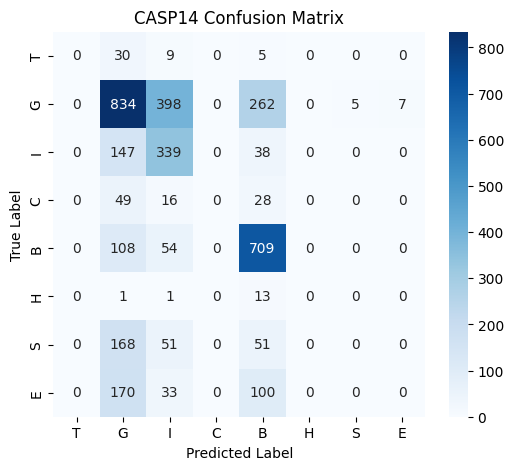


🔍 Evaluating on TS115 dataset...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



✅ Accuracy on TS115: 0.5381

📊 Classification Report for TS115:
              precision    recall  f1-score   support

           B     0.0000    0.0000    0.0000       295
           C     0.4693    0.5920    0.5236      7598
           E     0.5704    0.5213    0.5447      5085
           G     0.0000    0.0000    0.0000      1033
           H     0.5719    0.8413    0.6809     10434
           I     0.0000    0.0000    0.0000       174
           S     0.3810    0.0036    0.0072      2210
           T     0.4706    0.0167    0.0322      2875

    accuracy                         0.5381     29704
   macro avg     0.3079    0.2469    0.2236     29704
weighted avg     0.4925    0.5381    0.4700     29704



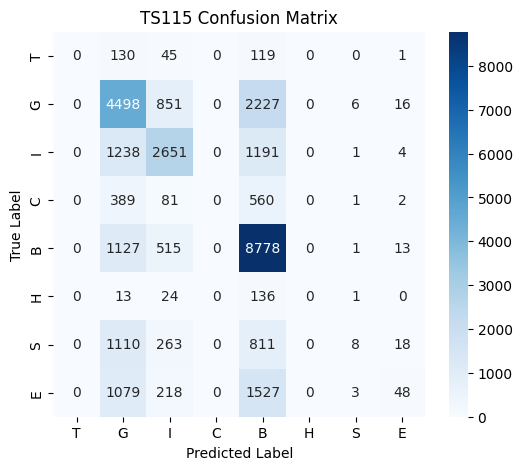


🎯 Testing completed!


In [16]:
evaluate_model(X_casp14, y_casp14, "CASP14")
evaluate_model(X_ts115, y_ts115, "TS115")

print("\n🎯 Testing completed!")
